<a href="https://colab.research.google.com/github/jofmorenore/Modelos_Lineales/blob/main/Corr_RLS/parcial1_FM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
libs = list("MASS", "lmtest", "nortest", "QuantPsyc")
lapply(libs, function(x) install.packages(x))

In [ ]:
%%R
library(MASS)
library(lmtest)
library(nortest)
library(QuantPsyc)

# Lectura de datos

# **trees**

In [ ]:
%%R
require(stats)
require(graphics)
attach(trees)
str(trees)


    Girth, Height, Volume




'data.frame':	31 obs. of  3 variables:
 $ Girth : num  8.3 8.6 8.8 10.5 10.7 10.8 11 11 11.1 11.2 ...
 $ Height: num  70 65 63 72 81 83 66 75 80 75 ...
 $ Volume: num  10.3 10.3 10.2 16.4 18.8 19.7 15.6 18.2 22.6 19.9 ...


In [ ]:
%%R
?trees

File: /tmp/RtmpJCS2ix/Rtxt3d5548773a
trees                 package:datasets                 R Documentation



_D_i_a_m_e_t_e_r, _H_e_i_g_h_t _a_n_d _V_o_l_u_m_e _f_o_r _B_l_a_c_k _C_h_e_r_r_y _T_r_e_e_s



_D_e_s_c_r_i_p_t_i_o_n:



     This data set provides measurements of the diameter, height and

     volume of timber in 31 felled black cherry trees.  Note that the

     diameter (in inches) is erroneously labelled Girth in the data. It

     is measured at 4 ft 6 in above the ground.



_U_s_a_g_e:



     trees

     

_F_o_r_m_a_t:



     A data frame with 31 observations on 3 variables.



       ‘[,1]’  ‘Girth’   numeric  Tree diameter (rather than girth, actually) in inches 

       ‘[,2]’  ‘Height’  numeric  Height in ft                                          

       ‘[,3]’  ‘Volume’  numeric  Volume of timber in cubic ft                          

      

_S_o_u_r_c_e:



     Ryan, T. A., Joiner, B

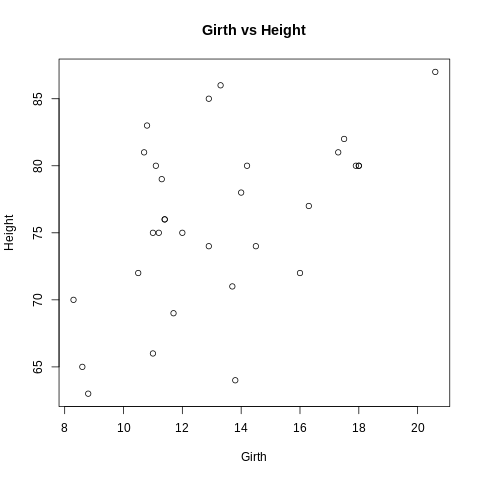

In [ ]:
%%R
plot(Girth , Height, main="Girth vs Height")

## Test de Mardia
+ Ho: el vector aleatorio proviene de una normal bivariada.
+ Ha: el vector aleatorio NO proviene de una normal bivariada.

valores.p: 0.95 (Skewness) y 0.32 (Kurtosis)

In [ ]:
%%R
trees = trees[,-3]
trees
#MVN::mvn(GRANOLAS) 

   Girth Height
1    8.3     70
2    8.6     65
3    8.8     63
4   10.5     72
5   10.7     81
6   10.8     83
7   11.0     66
8   11.0     75
9   11.1     80
10  11.2     75
11  11.3     79
12  11.4     76
13  11.4     76
14  11.7     69
15  12.0     75
16  12.9     74
17  12.9     85
18  13.3     86
19  13.7     71
20  13.8     64
21  14.0     78
22  14.2     80
23  14.5     74
24  16.0     72
25  16.3     77
26  17.3     81
27  17.5     82
28  17.9     80
29  18.0     80
30  18.0     80
31  20.6     87


In [ ]:
%%R
mult.norm(trees)$mult.test

         Beta-hat     kappa     p-val
Skewness 0.529848  2.737548 0.6026604
Kurtosis 5.981926 -1.404520 0.1601641


In [ ]:
!pip3 install pingouin

In [ ]:
%R -o trees trees <- trees
# H0: The variables follow a multivariate normal distribution.
# Ha: The variables do not follow a multivariate normal distribution.

import pingouin as pg
pg.multivariate_normality(trees, alpha=.05)

HZResults(hz=0.6636802869840224, pval=0.12749059799941737, normal=True)

## Coeficiente de correlación

+ $H_0$: rho es cero. 
+ $H_a$: rho es distinto de cero. 

In [ ]:
%%R
# No rechazo H0. (ó rho puede ser cero (valor.p=0.4))
# r = 0.35 (Interpretar significancia y signo).
cor.test(Girth, Height, data="trees") 


	Pearson's product-moment correlation

data:  Girth and Height
t = 3.2722, df = 29, p-value = 0.002758
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2021327 0.7378538
sample estimates:
      cor 
0.5192801 



# **road**

In [ ]:
%%R
attach(road)
str(road)


    fuel, popden



    deaths, drivers, fuel, popden, rural, temp



    deaths, drivers




'data.frame':	26 obs. of  6 variables:
 $ deaths : int  968 43 588 640 4743 566 325 118 115 1545 ...
 $ drivers: int  158 11 91 92 952 109 167 30 35 298 ...
 $ popden : num  64 0.4 12 34 100 ...
 $ rural  : num  66 5.9 33 73 118 73 5.1 3.4 0 57 ...
 $ temp   : int  62 30 64 51 65 42 37 41 44 67 ...
 $ fuel   : num  119 6.2 65 74 105 78 95 20 23 216 ...


In [ ]:
%%R
?road

File: /tmp/RtmpJCS2ix/Rtxt3d5f370a46
road                   package:MASS                    R Documentation



_R_o_a_d _A_c_c_i_d_e_n_t _D_e_a_t_h_s _i_n _U_S _S_t_a_t_e_s



_D_e_s_c_r_i_p_t_i_o_n:



     A data frame with the annual deaths in road accidents for half the

     US states.



_U_s_a_g_e:



     road

     

_F_o_r_m_a_t:



     Columns are:



     ‘state’ name.



     ‘deaths’ number of deaths.



     ‘drivers’ number of drivers (in 10,000s).



     ‘popden’ population density in people per square mile.



     ‘rural’ length of rural roads, in 1000s of miles.



     ‘temp’ average daily maximum temperature in January.



     ‘fuel’ fuel consumption in 10,000,000 US gallons per year.



_S_o_u_r_c_e:



     Imperial College, London M.Sc. exercise



---


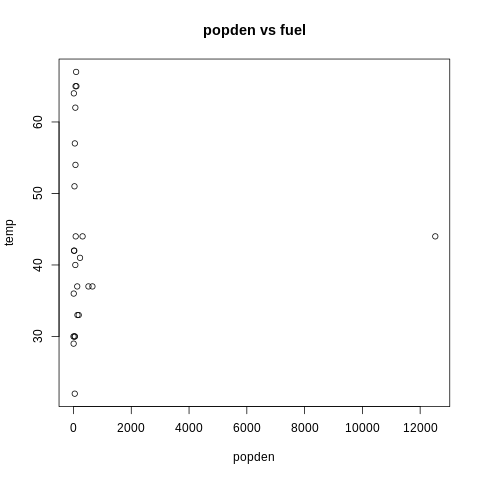

In [ ]:
%%R
plot(popden, temp, main="popden vs fuel")

In [ ]:
%%R
road = road[, c(3,5)]
road

         popden temp
Alabama    64.0   62
Alaska      0.4   30
Arizona    12.0   64
Arkanas    34.0   51
Calif     100.0   65
Colo       17.0   42
Conn      518.0   37
Dela      226.0   41
DC      12524.0   44
Florida    91.0   67
Georgia    68.0   54
Idaho       8.1   36
Ill       180.0   33
Ind       129.0   37
Iowa       49.0   30
Kansas     27.0   42
Kent       76.0   44
Louis      72.0   65
Maine      31.0   30
Maryl     314.0   44
Mass      655.0   37
Mich      137.0   33
Minn       43.0   22
Miss       46.0   57
Mo         63.0   40
Mont        4.6   29


## Test de Normalidad Multivariada

In [ ]:
%%R
mult.norm(road)$mult.test

         Beta-hat    kappa p-val
Skewness 20.54004 89.00686     0
Kurtosis 24.07378 10.24507     0


In [ ]:
%R -o road road <- road
# H0: The variables follow a multivariate normal distribution.
# Ha: The variables do not follow a multivariate normal distribution.
pg.multivariate_normality(road, alpha=.05)

HZResults(hz=3.381413600567459, pval=4.1734132869122214e-08, normal=False)

## Coeficiente de correlación

1) p.value= 0.002 

2) sample estimates:

    rho 
    0.8389097 

In [ ]:
%%R
cor.test(popden,  temp, data="road", method="spearman") 


	Spearman's rank correlation rho

data:  popden and temp
S = 2351.5, p-value = 0.3371
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.1960589 



# WAGESALARY

In [ ]:
%%R
WAGESALARY = data.frame(EMPLOYEE = c(1:7,11:19),
                        AGE = c(35,29,37,27,52,50,26,30,26,30,41,46,26,36,38,28),
                        EDUCATION = c(13,17,12,14,12,17,18,15,16,17,15,9,17,14,18,8),
                        HOURS = c(2080,2080,0,2340,2080,2340,3120,3640,2100,2080,1976,0,2600,2860,1820,0),
                        WAGESALARY = c(29957.3,46940.52,0,27121.19,37813.2,0,93881.04,16298.79,0,65195.17,36509.29,3694.73,62587.36,20862.45,0,0))

In [ ]:
%%R
WAGESALARY

   EMPLOYEE AGE EDUCATION HOURS WAGESALARY
1         1  35        13  2080   29957.30
2         2  29        17  2080   46940.52
3         3  37        12     0       0.00
4         4  27        14  2340   27121.19
5         5  52        12  2080   37813.20
6         6  50        17  2340       0.00
7         7  26        18  3120   93881.04
8        11  30        15  3640   16298.79
9        12  26        16  2100       0.00
10       13  30        17  2080   65195.17
11       14  41        15  1976   36509.29
12       15  46         9     0    3694.73
13       16  26        17  2600   62587.36
14       17  36        14  2860   20862.45
15       18  38        18  1820       0.00
16       19  28         8     0       0.00


# Ajuste del modelo lineal

In [ ]:
%%R
wage.fit11 = lm(WAGESALARY ~ HOURS, data = WAGESALARY) # 1) AJUSTAR EL MODELO 
wage.fit11     ### 2) COEFICIENTES ESTIMADOS bo y b1


Call:
lm(formula = WAGESALARY ~ HOURS, data = WAGESALARY)

Coefficients:
(Intercept)        HOURS  
    2019.33        13.13  



In [ ]:
%%R
resid.hours<-residuals(wage.fit11)  ### Residuales (errores estimados)
resid.hours

          1           2           3           4           5           6 
   627.6584  17610.8784  -2019.3320  -5622.2403   8483.5584 -32743.4303 
          7           8           9          10          11          12 
 50896.2436 -33513.5838 -29592.2408  35865.5284   8545.1639   1675.3980 
         13          14          15          16 
 26430.1410 -18708.5577 -25915.8529  -2019.3320 


In [ ]:
%%R
summary(wage.fit11)


Call:
lm(formula = WAGESALARY ~ HOURS, data = WAGESALARY)

Residuals:
   Min     1Q Median     3Q    Max 
-33514 -20510   -696  10812  50896 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept)  2019.332  13568.225   0.149    0.884  
HOURS          13.130      6.153   2.134    0.051 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 25590 on 14 degrees of freedom
Multiple R-squared:  0.2454,	Adjusted R-squared:  0.1915 
F-statistic: 4.554 on 1 and 14 DF,  p-value: 0.05102



# Babies

# Lectura de datos

In [ ]:
import pandas as pd
# pip show pd
print(pd.__version__)

1.3.5


In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# convertir con el bloc de notas de ANSI a UTF-8
babies = pd.read_csv('/content/gdrive/MyDrive/Maestría Estadística/Modelos Lineales/Tallas.babies.csv', sep = ';', decimal=",")

In [ ]:
babies.dtypes

Talla.hoy      float64
Edad.días        int64
Talla_nacer    float64
Peso_nacer     float64
Tórax_nacer    float64
dtype: object

In [ ]:
%R -i babies

In [ ]:
%%R
str(babies)

'data.frame':	7 obs. of  5 variables:
 $ Talla.hoy  : num  57.5 52.8 61.3 67 53.5 62.7 56.2
 $ Edad.días  : int  78 69 77 88 67 80 74
 $ Talla_nacer: num  48.2 45.5 46.3 49 43 48 48
 $ Peso_nacer : num  2.75 2.15 4.41 5.52 3.21 4.32 2.31
 $ Tórax_nacer: num  29.5 26.3 32.2 36.5 27.2 27.7 28.3


In [ ]:
%%R
fx = list(attach, head, summary, dim)
lapply(fx, function(f) f(babies))

[[1]]
<environment: 0xc307738>
attr(,"name")
[1] "babies"

[[2]]
  Talla.hoy Edad.días Talla_nacer Peso_nacer Tórax_nacer
0      57.5        78        48.2       2.75        29.5
1      52.8        69        45.5       2.15        26.3
2      61.3        77        46.3       4.41        32.2
3      67.0        88        49.0       5.52        36.5
4      53.5        67        43.0       3.21        27.2
5      62.7        80        48.0       4.32        27.7

[[3]]
   Talla.hoy       Edad.días      Talla_nacer      Peso_nacer   
 Min.   :52.80   Min.   :67.00   Min.   :43.00   Min.   :2.150  
 1st Qu.:54.85   1st Qu.:71.50   1st Qu.:45.90   1st Qu.:2.530  
 Median :57.50   Median :77.00   Median :48.00   Median :3.210  
 Mean   :58.71   Mean   :76.14   Mean   :46.86   Mean   :3.524  
 3rd Qu.:62.00   3rd Qu.:79.00   3rd Qu.:48.10   3rd Qu.:4.365  
 Max.   :67.00   Max.   :88.00   Max.   :49.00   Max.   :5.520  
  Tórax_nacer   
 Min.   :26.30  
 1st Qu.:27.45  
 Median :28.30  
 Mean 

In [ ]:
%%R
libs = list("MASS", "lmtest", "nortest")
lapply(libs, function(x) install.packages(x))

In [ ]:
%%R
library(MASS)
library(lmtest)
library(nortest)

# Ajuste modelo lineal

In [ ]:
%%R
baby.fit12<-lm(Talla.hoy~Peso_nacer, data = babies) # 1) AJUSTAR EL MODELO 
baby.fit12   


Call:
lm(formula = Talla.hoy ~ Peso_nacer, data = babies)

Coefficients:
(Intercept)   Peso_nacer  
     45.396        3.779  



# Validación de supuestos
Cumple los tres supuestos!!!

+ **Normalidad**

In [ ]:
%%R 
# https://rpubs.com/MSiguenas/122473
# H0: La muestra proviene de una distribución normal.
# H1: La muestra no proviene de una distribución normal.
test_normal = c(shapiro.test, lillie.test) # ad.test, cvm.test, pearson.test, sf.test
# ?ad.test # x: a numeric vector of data values, the number of which must be greater than 7.
lapply(test_normal, function(f) f(residuals(baby.fit12)))

[[1]]

	Shapiro-Wilk normality test

data:  residuals(baby.fit12)
W = 0.88086, p-value = 0.2303


[[2]]

	Lilliefors (Kolmogorov-Smirnov) normality test

data:  residuals(baby.fit12)
D = 0.21455, p-value = 0.426




+ **Homocedasticidad**

In [ ]:
%%R
# H0: existe homocedasticidad 
# H1: no existe homocedasticidad (existe heterocedasticidad)
test_hmcd = c(bptest, gqtest) 
# ?ad.test # x: a numeric vector of data values, the number of which must be greater than 7.
#lapply(test_hmcd, function(f) f(lm(Talla.hoy~ Tórax_nacer)))
lapply(test_hmcd, function(f) f(lm(Talla.hoy~ Peso_nacer)))

[[1]]

	studentized Breusch-Pagan test

data:  lm(Talla.hoy ~ Peso_nacer)
BP = 0.45326, df = 1, p-value = 0.5008


[[2]]

	Goldfeld-Quandt test

data:  lm(Talla.hoy ~ Peso_nacer)
GQ = 2.9412, df1 = 2, df2 = 1, p-value = 0.3812
alternative hypothesis: variance increases from segment 1 to 2




+ **Independencia**

In [ ]:
%%R
# H0: Residuals from the regression are not autocorrelated (autocorrelation coefficient, ρ = 0)
# Ha: Residuals from the regression are autocorrelated (autocorrelation coefficient, ρ > 0)
dwtest(Talla.hoy ~ residuals(baby.fit12)) # Durbin Watson independencia


	Durbin-Watson test

data:  Talla.hoy ~ residuals(baby.fit12)
DW = 1.8292, p-value = 0.4162
alternative hypothesis: true autocorrelation is greater than 0



In [ ]:
%%R
anova(baby.fit12) ### SÍ SE PUEDE INTERPRETAR LA PENDIENTE.

Analysis of Variance Table

Response: Talla.hoy
           Df  Sum Sq Mean Sq F value   Pr(>F)   
Peso_nacer  1 135.131 135.131  25.929 0.003796 **
Residuals   5  26.058   5.212                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
